<a href="https://colab.research.google.com/github/guilhermelaviola/NaturalLanguageProcessingBasics/blob/main/NextWordPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importing all the necessary libraries:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [14]:
# Importing the dataset:
path = '1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [15]:
# Splitting the dataset into each word in order but without the presence
# of some special characters:
tokenizer = RegexpTokenizer(r'w+')
words = tokenizer.tokenize(text)

In [16]:
# Requiring a dictionary with each word in the data within the list
# of unique words as the key, and its significant portions as values:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [17]:
# Defining Word length which will represent the number of previous words that
# will determine our next word.
WORD_LENGTH = 5
previous_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
  previous_words.append(words[i : i + WORD_LENGTH])
  next_words.append(words[i + WORD_LENGTH])
print(previous_words[0])
print(next_words[0])

['w', 'w', 'w', 'w', 'w']
www


In [18]:
# Creating numpy arrays x for storing the features and y for
# storing its corresponding label.
X = np.zeros((len(previous_words), WORD_LENGTH, len(unique_words)), dtype = bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype = bool)
for i, each_words in enumerate(previous_words):
  for j, each_word in enumerate(each_words):
    X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [19]:
# Checking the sequence of words:
print(X[0][0])

[ True False]


In [20]:
# Using the LSTM model, which is a Recurrent Neural networks for
# next word prediction model:
model = Sequential()
model.add(LSTM(128, input_shape = (WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [21]:
# Training the word prediction with 20 epochs:
optimizer = RMSprop(lr = 0.01)
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
history = model.fit(X,
                    Y,
                    validation_split = 0.05,
                    batch_size = 128,
                    epochs = 2,
                    shuffle = True).history

Epoch 1/2
86/86 [==============================] - 4s 21ms/step - loss: 0.0580 - accuracy: 0.9882 - val_loss: 0.1270 - val_accuracy: 0.9844
Epoch 2/2
86/86 [==============================] - 1s 15ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.1446 - val_accuracy: 0.9844


In [23]:
# Saving the model for future use:
model.save('keras_next_word_model.h5')
pickle.dump(history, open('history.p', 'wb'))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open('history.p', 'rb'))

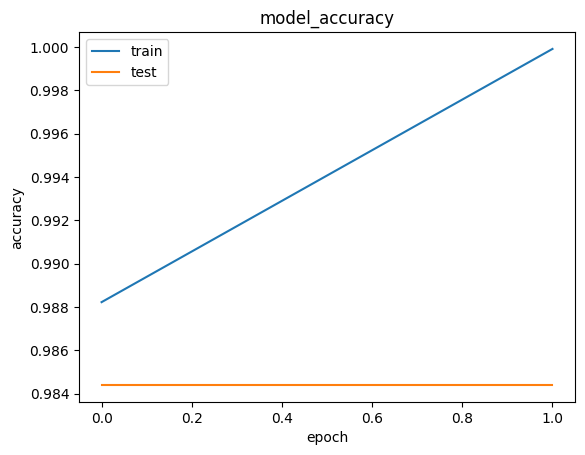

In [26]:
# Evaluating the model based on how its accuracy changes while training:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

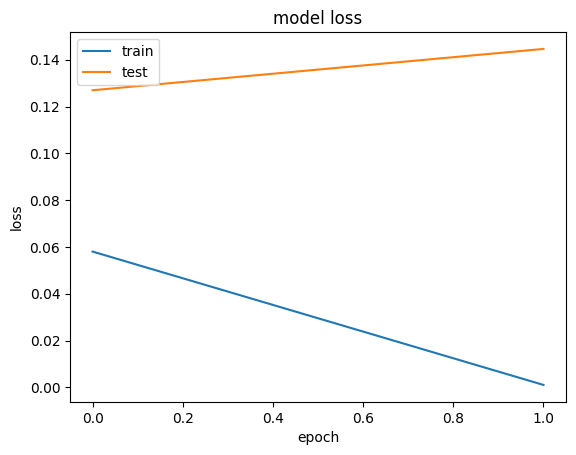

In [27]:
# Evaluating the model based on how its loss changes while training:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

In [37]:
# Building a program to predict th next word using the training model:
def prepare_input(text):
  X = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
  for t, char in enumerate(text):
    X[0, t, char_indexes[char]] = 1.
  return X

In [36]:
# Testing the fnction (making sure to use a lower() function while giving input )
prepare_input('This is an example of input'.lower())

NameError: ignored

In [ ]:
# Checking if the created function is working:
def prepare_input(text):
  x = np.zeros((1, WORD_LENGTH, len(unique_words)))
  for t, word in enumerate(text.split()):
    print(word)
    x[0, t, unique_word_index[word]] = 1
  return x
prepare_input('It is not a lack'.lower())

In [ ]:
# Creating a function to return samples:
def sample(preds, top_n = 3):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds)
  exp_preds = np.expp(preds)
  preds = exp_preds / np.sum(exp_preds)

  return heapq.nlargest(top_n, range(len(preds), preds.take)

In [ ]:
def predict_completion(text):
  original_text = text
  generated = text
  generated = text
  compeltion = ''
  while True:
    X = prepare_input(text)
    preds = model.predict(X, verbose = 0)[0]
    next_index = sample(preds. top_n = 1)[0]
    next_char = indexes_char[next_index]
    text = text[1:] + next_char
    completion += next_char

    if len(original_text + completion) + 2 > len(original_text)
    and next_char == ' ':
      return completion

In [ ]:
# Predicting the next word until space is generated by iterating the input,
# which will ask the RNN model and extracts instances from it:
def predict_completions(text, n = 3):
  x = prepare-input(text)
  preds = model.predict(x, verbose = 0)[0]
  next_indexes = sample(preds, n)
  return [indexes_char,[idx] + predict_completion(text[1:] + indexes_char[idx])
  for idx in next_indexes]

In [ ]:
# Defining a sequence of 40 characters that can be used as a base for
# the predictions:
quotes = [
    'It is not a lack of love, but a lack of friendship that makes unhappy marriages.,
    'That which does not kill us makes us stronger.',
    'I am not upset that you lied to me, I am upset that from now on I cannot believe you.',
    'And those who were seen dancing were thought to be insane by those who could not hear the music.',
    'It is hard enough to remember my opinions, without also remembering my reasons for them!'
]

In [ ]:
# Using the model to predict the next word:
for q in quotes:
  seq = q[:40].lower()
  print(seq)
  print(predict_completions(seq, 5))
  print()